<a href="https://colab.research.google.com/github/fthau/Data-Mining/blob/main/Lab_1_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fernandothaureaux","key":"8fe5e5332b260edb63c39ecdc9b12e8d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning


Dataset URL: https://www.kaggle.com/datasets/ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning
License(s): CC-BY-SA-4.0
retail-store-sales-dirty-for-data-cleaning.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile("retail-store-sales-dirty-for-data-cleaning.zip", "r") as zip_ref:
    zip_ref.extractall("retail_data")


In [ ]:
import pandas as pd

df = pd.read_csv("retail_data/retail_store_sales.csv")
df.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [ ]:

# Detect missing values
missing_summary = df.isnull().sum()

# Only show columns with missing data
missing_summary = missing_summary[missing_summary > 0]

# Count rows with ANY missing values
rows_with_missing = df.isnull().any(axis=1).sum()

print("Missing values by column:")
print(missing_summary)
print("\nTotal rows affected by missing data:", rows_with_missing)


Missing values by column:
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Discount Applied    4199
dtype: int64

Total rows affected by missing data: 4996


1. Detecting and Summarize Values

The features that have missing data are Item, Price Per Unit, Quantity, Total Spent, and Discount Applied.

In total, there were 4996 (out of 12,575) rows with missing data - in any given column.

Missing data could come from human entry error, system glitches, or unavailable info at purchase time.

In [ ]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Option A: Drop rows with missing values
df_drop = df.dropna()

# Option B: Fill numeric with mean, categorical with mode
df_fill = df.copy()
for col in df_fill.columns:
    if df_fill[col].dtype in ['int64', 'float64']:
        df_fill[col] = df_fill[col].fillna(df_fill[col].mean())
    else:
        df_fill[col] = df_fill[col].fillna(df_fill[col].mode()[0])

# Option C: Fill numeric with median, categorical with mode
df_median = df.copy()
for col in df_median.columns:
    if df_median[col].dtype in ['int64', 'float64']:
        df_median[col] = df_median[col].fillna(df_median[col].median())
    else:
        df_median[col] = df_median[col].fillna(df_median[col].mode()[0])

# --- Check results ---
print("Original rows:", len(df))
print("After dropping:", len(df_drop))
print("After mean/mode fill - missing values left:\n", df_fill.isnull().sum().sum())
print("After median/mode fill - missing values left:\n", df_median.isnull().sum().sum())


Original rows: 12575
After dropping: 7579
After mean/mode fill - missing values left:
 0
After median/mode fill - missing values left:
 0


2. Handle Missing Values

After comparing the 3 methods, I would recommend option C (median + mode imputation).

* Dropping rows (Option A), reduces the dataset size too much, which risks losing useful information. Dropping rows like this would only make sense if the number of missing rows was small compared to the full dataset, not almost half.

* Mean + mode (Option B) imputation works well for symmetric data, but the Total Spent amounts show skewness and potentially some outliers - as seen from the Histogram on Kaggle - which makes the mean much less reliable.

* Median + mode (Option C) imputation is more robust and resistant to skewness, and preserves dataset size, making it the best balance for completeness and accuracy.

Worth noting the only difference between Option B and Option C is how we fill the missing numeric features (mean vs median), they both fill the missing categorical features the same way - using Mode (the most common value in the category).

In [ ]:

import pandas as pd

# Look at categorical / object columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    unique_vals = df[col].dropna().unique()
    print(f"\n--- {col} ---")
    print(f"Unique values (sample up to 20): {unique_vals[:20]}")
    print(f"Total unique values: {len(unique_vals)}")



--- Transaction ID ---
Unique values (sample up to 20): ['TXN_6867343' 'TXN_3731986' 'TXN_9303719' 'TXN_9458126' 'TXN_4575373'
 'TXN_7482416' 'TXN_3652209' 'TXN_1372952' 'TXN_9728486' 'TXN_2722661'
 'TXN_8776416' 'TXN_5422631' 'TXN_5874772' 'TXN_4413070' 'TXN_2490363'
 'TXN_1809665' 'TXN_7563311' 'TXN_9634894' 'TXN_4396807' 'TXN_4206593']
Total unique values: 12575

--- Customer ID ---
Unique values (sample up to 20): ['CUST_09' 'CUST_22' 'CUST_02' 'CUST_06' 'CUST_05' 'CUST_07' 'CUST_21'
 'CUST_23' 'CUST_25' 'CUST_14' 'CUST_15' 'CUST_17' 'CUST_01' 'CUST_10'
 'CUST_04' 'CUST_13' 'CUST_18' 'CUST_08' 'CUST_20' 'CUST_12']
Total unique values: 25

--- Category ---
Unique values (sample up to 20): ['Patisserie' 'Milk Products' 'Butchers' 'Beverages' 'Food' 'Furniture'
 'Electric Household Essentials' 'Computers And Electric Accessories']
Total unique values: 8

--- Item ---
Unique values (sample up to 20): ['Item_10_PAT' 'Item_17_MILK' 'Item_12_BUT' 'Item_16_BEV' 'Item_6_FOOD'
 'Item_1_FOOD

3. Standardize Inconsistent Formats

* Categorical columns often have inconsistent capitalization/spaces
* Date formats may be inconsistent
* Before and after proves clean-up

In [ ]:

# Keep a copy of original categories for comparison
df['Category_before'] = df['Category']

# Define mapping for inconsistent/long names
category_mapping = {
    "Electric household essentials": "Electronics",
    "Computers and electric accessories": "Electronics",
    "Butchers": "Meat",
    "Food": "Groceries"
}

# Apply mapping
df['Category'] = df['Category'].replace(category_mapping)

# Compare value counts before vs after
print("Category counts (before standardization):")
print(df['Category_before'].value_counts().head(10))
print("\nCategory counts (after standardization):")
print(df['Category'].value_counts().head(10))


# Keep a copy of original dates for comparison
df['Transaction Date_before'] = df['Transaction Date']

# Convert to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Show a few before vs after
print("\nTransaction Date (before):")
print(df['Transaction Date_before'].head(5).tolist())
print("\nTransaction Date (after):")
print(df['Transaction Date'].head(5).tolist())


Category counts (before standardization):
Category_before
Electric household essentials         1591
Furniture                             1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: count, dtype: int64

Category counts (after standardization):
Category
Electronics      3149
Furniture        1591
Groceries        1588
Milk Products    1584
Meat             1568
Beverages        1567
Patisserie       1528
Name: count, dtype: int64

Transaction Date (before):
['2024-04-08', '2023-07-23', '2022-10-05', '2022-05-07', '2022-10-02']

Transaction Date (after):
[Timestamp('2024-04-08 00:00:00'), Timestamp('2023-07-23 00:00:00'), Timestamp('2022-10-05 00:00:00'), Timestamp('2022-05-07 00:00:00'), Timestamp('2022-10-02 00:00:00')]


Category column
* Issue: Some category names were inconsistent or overly specific, such as
    * "Electric household essentials" vs "Computers and electric accessories"
    * "Butchers" vs "Food"
* Fix: Standardized these into broader, consistent categories:
    * "Electric household essentials" becomes "Electronics"
    * "Computers and electric accessories" becomes "Electronics"
    * "Butchers" becomes "Meat"
    * "Food" becomes "Groceries"

Transaction Date column
* Issue: The Transaction Date column was stored as plain strings, which makes time-series analysis difficult.
    * Example before: "2024-04-08", "2023-07-23", "2022-10-05"
* Fix: Converted to Pandas datetime format using pd.to_datetime()

In [ ]:

# Check duplicates across all columns
duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)

# Drop duplicates
df_no_dupes = df.drop_duplicates()

print("Rows before:", len(df))
print("Rows after removing duplicates:", len(df_no_dupes))


Duplicate rows: 0
Rows before: 12575
Rows after removing duplicates: 12575


4. Detect and Remove Duplicates

* If a duplicate is exact across all fields, it is safe to drop.

* Sometimes you may define a “duplicate” by subset (e.g., same TransactionID, Date, CustomerID)

There are no duplicate transactions, seen as there are 12,575 rows/instances in the dataset, and exactly 12,575 unique Transaction IDs.

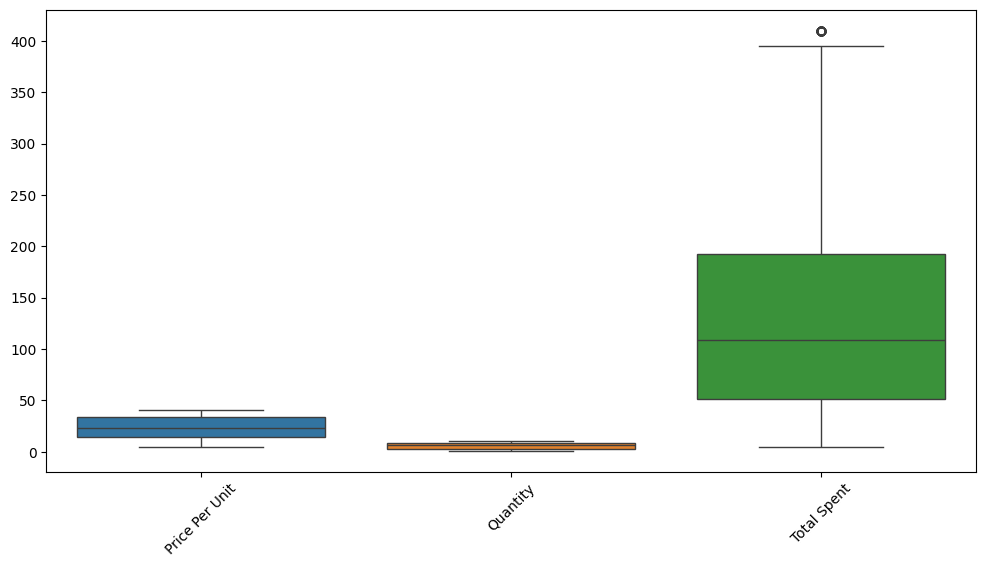

Potential outliers detected: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for numeric features
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.xticks(rotation=45)
plt.show()

# Simple automatic outlier detection using z-score
from scipy import stats
import numpy as np

numeric_df = df.select_dtypes(include=['int64','float64'])
z_scores = np.abs(stats.zscore(numeric_df, nan_policy='omit'))

outliers = (z_scores > 3).any(axis=1)
print("Potential outliers detected:", outliers.sum())


5. Explore and Discuss Potential Outliers

* Box-plot reveals extreme values (very high/low sale amounts)
* Z-score > 3 or < -3 flags statistical outliers
* Outliers may represent data errors (typos like 10000 instead of 100) OR real rare events (bulk purchase).

In [ ]:
import numpy as np
from scipy import stats

# Boxplot-based outliers
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
boxplot_outliers = df[(df['Total Spent'] < Q1 - 1.5*IQR) | (df['Total Spent'] > Q3 + 1.5*IQR)]

# Z-score outliers
z_scores = np.abs(stats.zscore(df['Total Spent'], nan_policy='omit'))
z_outliers = df[z_scores > 3]

print("Boxplot outliers:", len(boxplot_outliers))
print("Z-score outliers:", len(z_outliers))

Boxplot outliers: 60
Z-score outliers: 0


The boxplot detected at least one outlier in TotalSpent (shown as a circle), but the z-score method did not flag it.

This discrepancy occurs because boxplots use the IQR * 1.5 rule (non-parametric, therefore it doesn't assume normal distribution), which is more sensitive to skewed distributions, while z-scores assume a normal distribution and only flag very extreme deviations.

Since retail spending is usually skewed (most people spend little, some spend a lot), the boxplot is often more appropriate for detecting potential anomalies in this dataset.